**We will analyze Netflix Data to see if we can find any insights about how the country is related to the movies produced and what kind of content has been added to Netflix over the years.**

**First we import all the frameworks and libraries needed and we dump the csv file into a Pandas DataFrame.**

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

First we need to check if we have null values on our dataset using isnull function.

In [71]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

****We can see there is null values on director, cast, country, date_added, rating and duration. We will use "Not Provided" to fill out these missing values.****

In [72]:
df['director'].fillna("Not provided",inplace=True)
df['cast'].fillna("Not provided",inplace=True)
df['country'].fillna("Not provided",inplace=True)



****Now we'll drop the columns that we are no interested in.****

In [73]:
df = df.drop('cast',axis=1)
df=df.drop('description',axis=1)

****How many shows and movies have been added through the years? We can do a histogram with the count of tv shows/movies using the column year.****

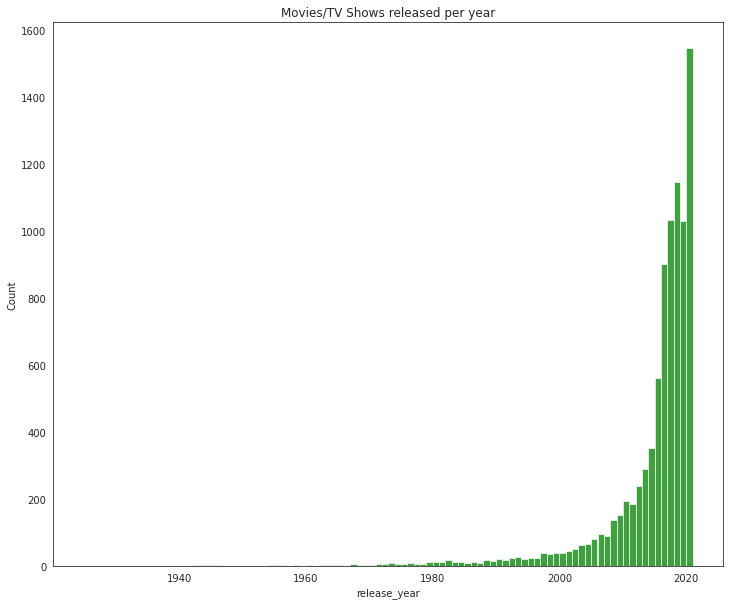

In [74]:
fig,ax= plt.subplots(figsize=(12,10))
ax=sns.histplot(df['release_year'],color='Green',binwidth=1,edgecolor='White').set_title('Movies/TV Shows released per year')

****Using a pie chart to identify the ration between Movies and TV Shows included in Netflix library we can see that 7 out of 10 productions are movies.****

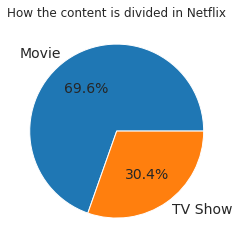

In [75]:
plt.pie(df['type'].value_counts(),labels=np.unique(df['type']),autopct='%1.1f%%',textprops={'fontsize': 14})
plt.title(label='How the content is divided in Netflix')
plt.show()

****Now we will use a csv file with the countries and their ISO codes to join this new dataframe with our current dataframe. This will allow us to use a library to render a map.****

In [76]:
codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
codes = codes.rename(columns = {'COUNTRY':'country' , 'CODE':'code'})
codes = codes.drop(columns=['GDP (BILLIONS)'])
codes.head()

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [77]:
movies_count=df[df.type == 'Movie']
countries_movies={}
for i in movies_count.country:
    i = list(i.split(','))
    for j in i:
        j = j.lstrip()
        if j in (countries_movies.keys()): 
            countries_movies[j] += 1 
        else: 
            countries_movies[j] = 1

del(countries_movies[''])
country_movies=pd.DataFrame({'country':list(countries_movies.keys()),'count':list(countries_movies.values())})


**Join the two dataframes.**

In [78]:
movies=pd.merge(country_movies,codes,how='left',on='country')
movies=movies.sort_values(by='country')
movies[movies.code.isnull()]

,country,count,code
97,Bahamas,1,NaN
116,East Germany,1,NaN
1,Not provided,440,NaN
58,Palestine,1,NaN
43,South Korea,61,NaN
88,Soviet Union,3,NaN
107,Vatican City,1,NaN
91,West Germany,3,NaN


**Some of the countries were not in the "Codes" dataframe so we need to rename this manually**

In [79]:
movies=movies.drop([1])
movies.code.loc[movies.country == 'South Korea'] = 'KR'
movies.code.loc[movies.country == 'Palestine'] = 'PS'
movies.code.loc[movies.country == 'West Germany'] = 'DD'
movies.code.loc[movies.country == 'East Germany'] = 'ED'
movies.code.loc[movies.country == 'Soviet Union'] = 'SU'
movies.code.loc[movies.country == 'Vatican City'] = 'VA'
movies.code.loc[movies.country == 'Bahamas'] = 'BS'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Rendering the map for the movies produced by every country**

In [80]:
fig = go.Figure(data=go.Choropleth(
    locations = movies['code'],
    z = movies['count'],
    text = movies['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='gray',
    marker_line_width=0.5,
    colorbar_title = 'Movies created',
))
fig.update_layout(title_text='Movies created by country')
fig.show()

**Now we will get the TV Shows per country**

In [81]:
shows_count=df[df.type == 'TV Show']
countries_shows={}
for i in shows_count.country:
    i = list(i.split(','))
    for j in i:
        j = j.lstrip()
        if j in (countries_shows.keys()): 
            countries_shows[j] += 1 
        else: 
            countries_shows[j] = 1

del(countries_shows[''])
country_shows=pd.DataFrame({'country':list(countries_shows.keys()),'count':list(countries_shows.values())})


In [82]:
shows=pd.merge(country_shows,codes,how='left',on='country')
shows=shows.sort_values(by='country')

In [83]:
fig = go.Figure(data=go.Choropleth(
    locations = shows['code'],
    z = shows['count'],
    text = shows['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='gray',
    marker_line_width=0.5,
    colorbar_title = 'Shows created',
))
fig.update_layout(title_text='Shows created by country')
fig.show()

**Lastly we will plot the relationship between the count of shows using the rating**

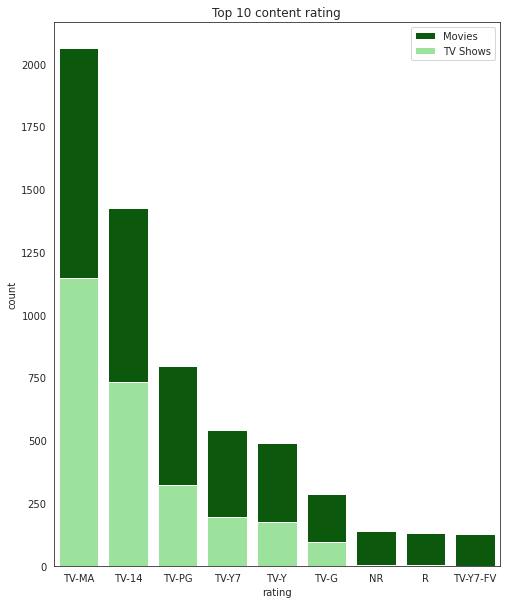

In [84]:
movies=df[df.type=='Movie']
shows=df[df.type == 'TV Show']

plt.figure(figsize=(8,10))
sns.set_style("white")
plt.title('Top 10 content rating')
sns.countplot(x='rating' , data=movies , color='darkgreen' , order=movies['rating'].value_counts().index[0:11])
sns.countplot(x='rating' , data=shows , color='lightgreen' , order=shows['rating'].value_counts().index[0:11])
plt.gca().legend(('Movies','TV Shows'))
plt.show()

We can observe that almost 100% of R-rated is movies.
For matura audiences there is almost the same amount of TV Shows and Movies.